<a href="https://colab.research.google.com/github/GUILLENJV/Pipeline/blob/master/PS_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Estadíticas Descriptivas

In [ ]:
df.shape

(10692, 13)

In [ ]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
df.describe(include = 'object')

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [ ]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [ ]:
df.duplicated().sum()

358

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Observaciones iniciales:

Hay 13 características y 10692 instancias

No hay valores NaN
* La mayoría de las columnas son numéricas
* Hay columnas con el tipo incorrecto
* La mayoría de las casas aceptan animales
* La mayoría de las casas no están amuebladas
* São Paulo es la ciudad con más casas
* Hay valores atípicos potenciales

## Comprobación de anomalías


In [ ]:
def categorize(columns):
    """
    This function return categorical and numerical values for a given dataframe
    """
    numerical,category=[],[]
    for i in columns:
        if df[i].dtype==object:
            category.append(i)
        else:
            numerical.append(i)
    print(f"The numerical features: {numerical}")
    print(f"The categorical features: {category}")
    return category,numerical

In [ ]:
categorical, numerical = categorize(df)

The numerical features: ['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']
The categorical features: ['city', 'floor', 'animal', 'furniture']


In [ ]:
for column in categorical:
    print(f'We are analyzing *{column}* unique values\n')
    print(df[column].unique().tolist())
    print('\n')
    print('*'*100)
    print('\n')

We are analyzing *city* unique values

['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte']


****************************************************************************************************


We are analyzing *floor* unique values

['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9', '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32']


****************************************************************************************************


We are analyzing *animal* unique values

['acept', 'not acept']


****************************************************************************************************


We are analyzing *furniture* unique values

['furnished', 'not furnished']


****************************************************************************************************




Aparentemente, la única anomalía que tenemos es un valor '-' en la columna floor. Por lo tanto, vamos a explorar un poco de ella y eliminar piso de categórica con el fin de una mejor exploración de datos

In [ ]:
categorical.remove('floor')

In [ ]:
df.loc[df['floor'] != '-']['floor'].astype(int).describe()

count    8231.000000
mean        6.583283
std         6.153925
min         1.000000
25%         2.000000
50%         5.000000
75%         9.000000
max       301.000000
Name: floor, dtype: float64

## Visualización

Veamos la distribución de la variable objetivo

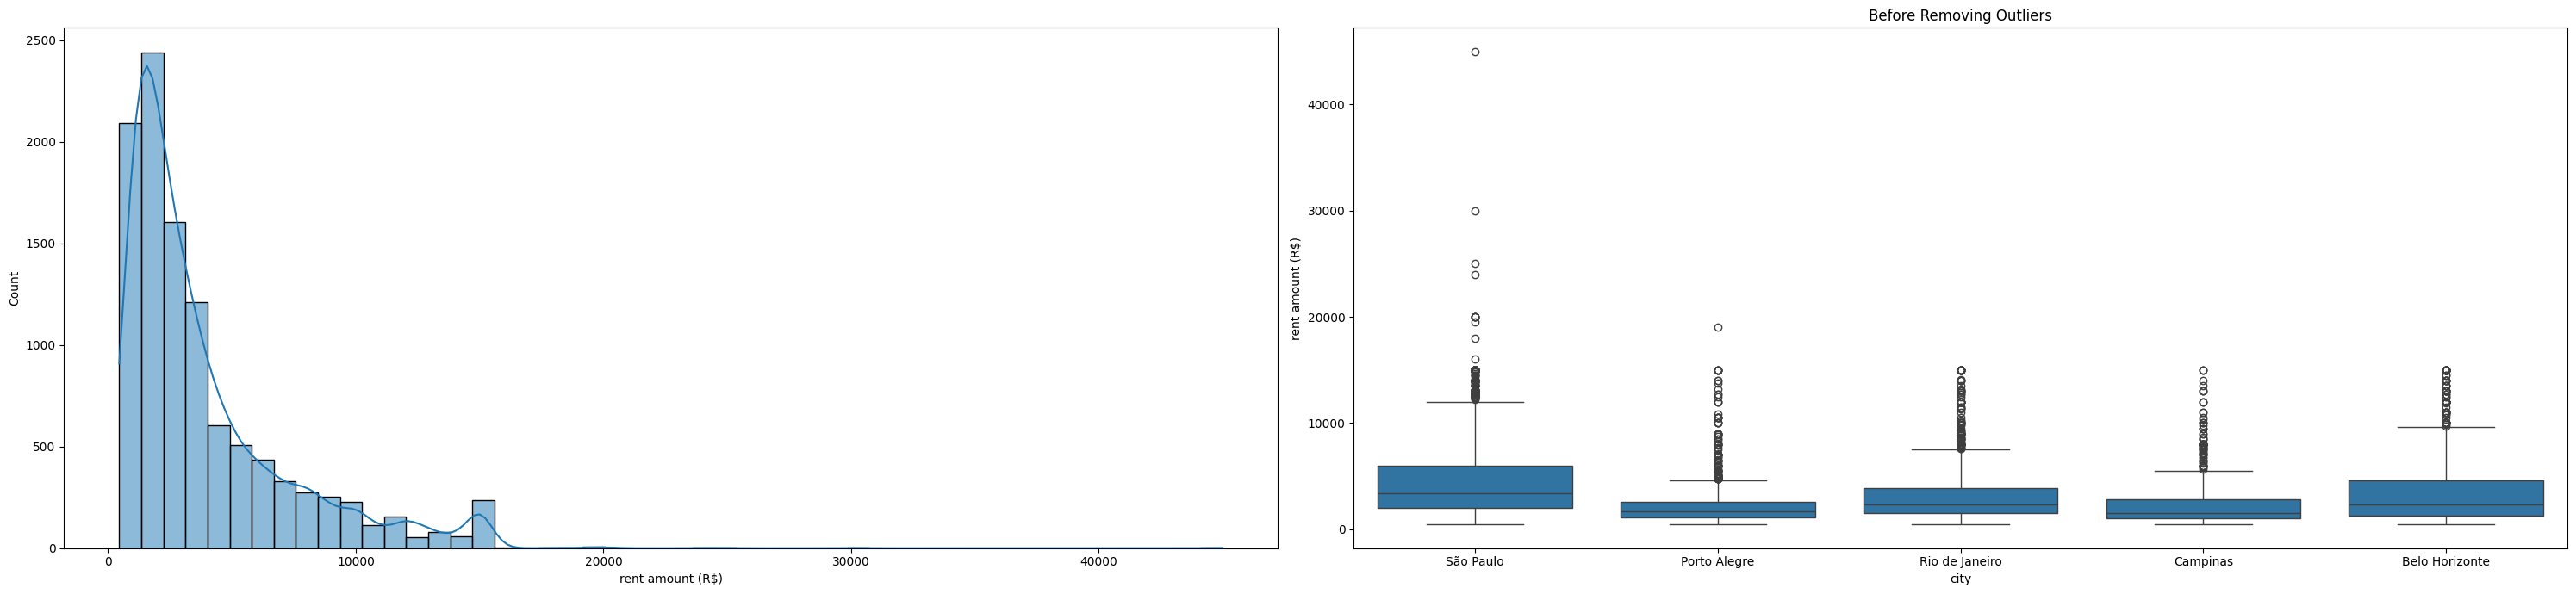

In [ ]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['rent amount (R$)'],kde=True,bins=50)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['city'], y=df['rent amount (R$)']).set_title('Before Removing Outliers')
plt.tight_layout()

Aparentemente, hay algunos valores atípicos en la variable objetivo, pero no es alarmante.

La variable objetivo no se distribuye normalmente, eso era de esperar.

De acuerdo con nuestros estadísticos descriptivos, hoa, property tax y area tienen valores atípicos potenciales, comprobemos su distribución

<Axes: xlabel='area'>

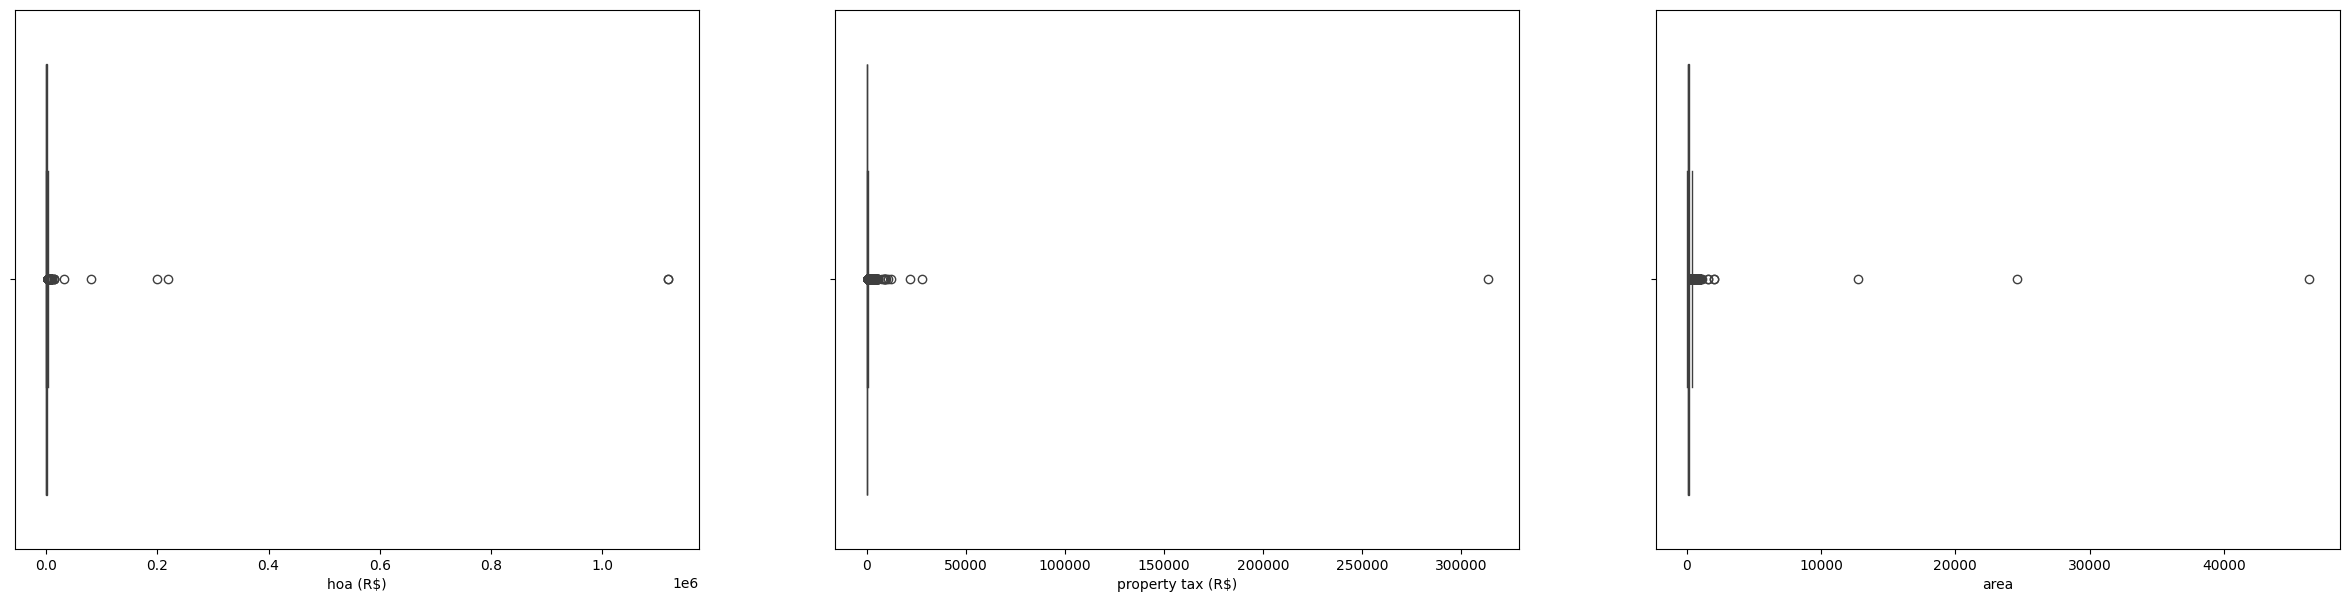

In [ ]:
plt.figure(figsize=(30, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='hoa (R$)', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='property tax (R$)', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='area', data=df)

Bien, podemos ver que estas columnas tienen valores atípicos muy visibles. Veamos si están correlacionadas

In [ ]:
df.loc[(df['area'] > df['area'].quantile(0.99)) | (df['hoa (R$)'] > df['hoa (R$)'].quantile(0.99)) | (df['property tax (R$)'] > df['property tax (R$)'].quantile(0.99))]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
19,São Paulo,600,4,5,6,-,acept,not furnished,0,12000,9500,181,21680
86,São Paulo,600,4,4,4,9,acept,not furnished,7400,8500,3368,108,19380
131,São Paulo,900,4,6,8,-,acept,not furnished,0,15000,4417,226,19640
143,Campinas,999,5,7,8,-,acept,not furnished,0,14000,667,211,14880
157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10426,São Paulo,600,4,3,3,1,acept,not furnished,6000,3750,1667,48,11470
10451,São Paulo,900,5,5,5,-,not acept,not furnished,0,15000,3334,226,18560
10472,Campinas,900,3,6,8,-,acept,not furnished,2000,15000,1834,226,19060
10480,São Paulo,399,3,5,4,21,acept,not furnished,7000,12000,0,153,19150


Estoy utilizando el cuantil 99 sólo para obtener el 1% a la izquierda de cada columna y ver si hay más de una columna con valores atípicos en los registros. Al parecer hay alguna relación.

## Exploremos nuestras características numéricas

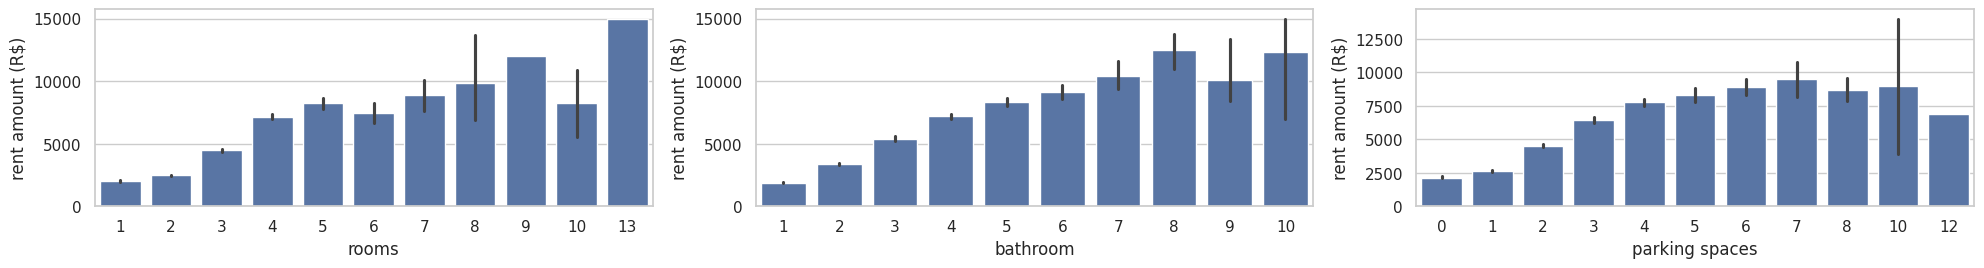

In [ ]:
# Since we are going to plot barplot's, let's only select a few columns to this specific type of graphic.

numerical1 = ['rooms', 'bathroom', 'parking spaces']
plt.figure(figsize=(20, 5))
sns.set(style = 'whitegrid')
i = 1
for feature in numerical1:
    plt.subplot(2, 3, i)
    sns.barplot(x = feature, y= 'rent amount (R$)', data=df)
    i+=1
plt.tight_layout()

* Las casas con más habitaciones tienen alquileres más caros, excepto las casas con 10 habitaciones cuando disminuye
* El alquiler aumenta hasta 8 baños, más allá curiosamente disminuye
* El alquiler aumenta hasta 7 plazas de aparcamiento, cuando se comporta de forma extraña, probablemente debido a las pocas muestras

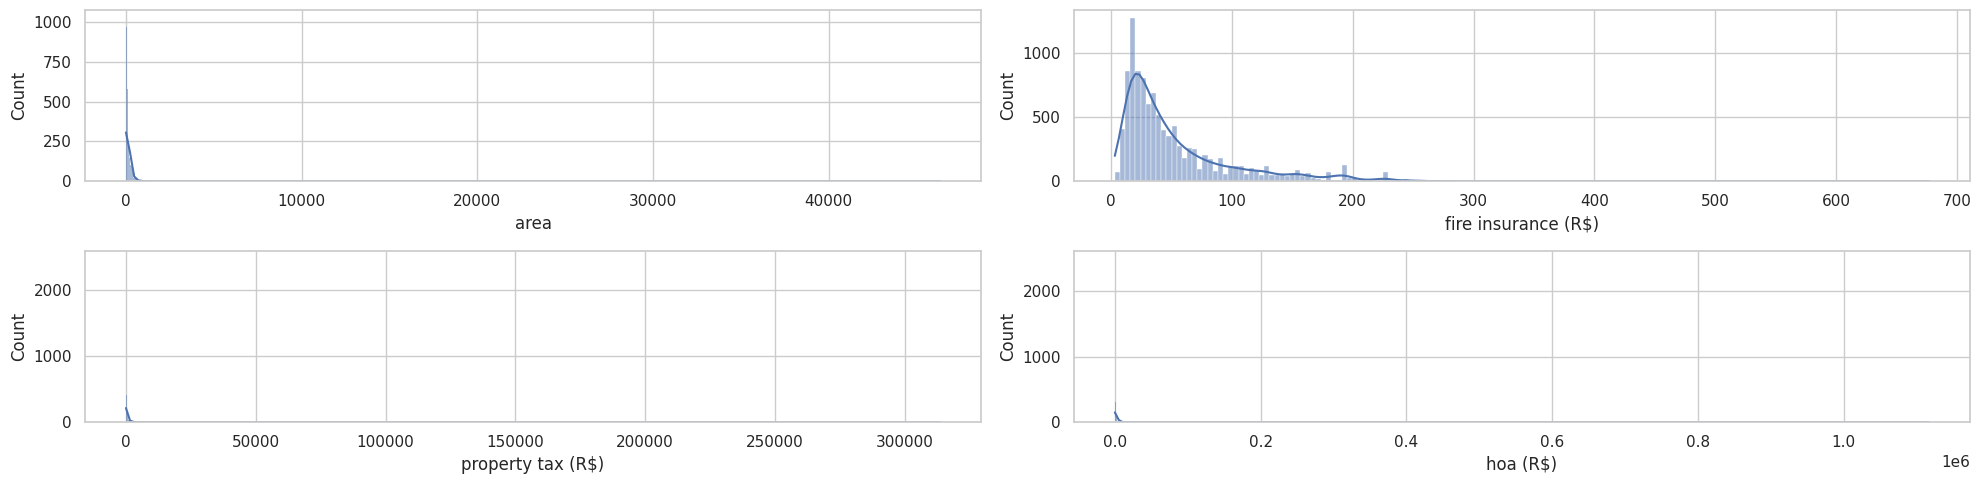

In [ ]:
# Now, let's plot histograms to all continuous numerical variables

numerical2 = ['area', 'fire insurance (R$)', 'property tax (R$)', 'hoa (R$)']
plt.figure(figsize=(20, 5))
j = 1
for feature2 in numerical2:
    plt.subplot(2, 2, j)
    sns.histplot(df[feature2],kde=True)
    j+=1
plt.tight_layout()

Veamos en detalle cómo se distribuyen los precios en la ciudad.

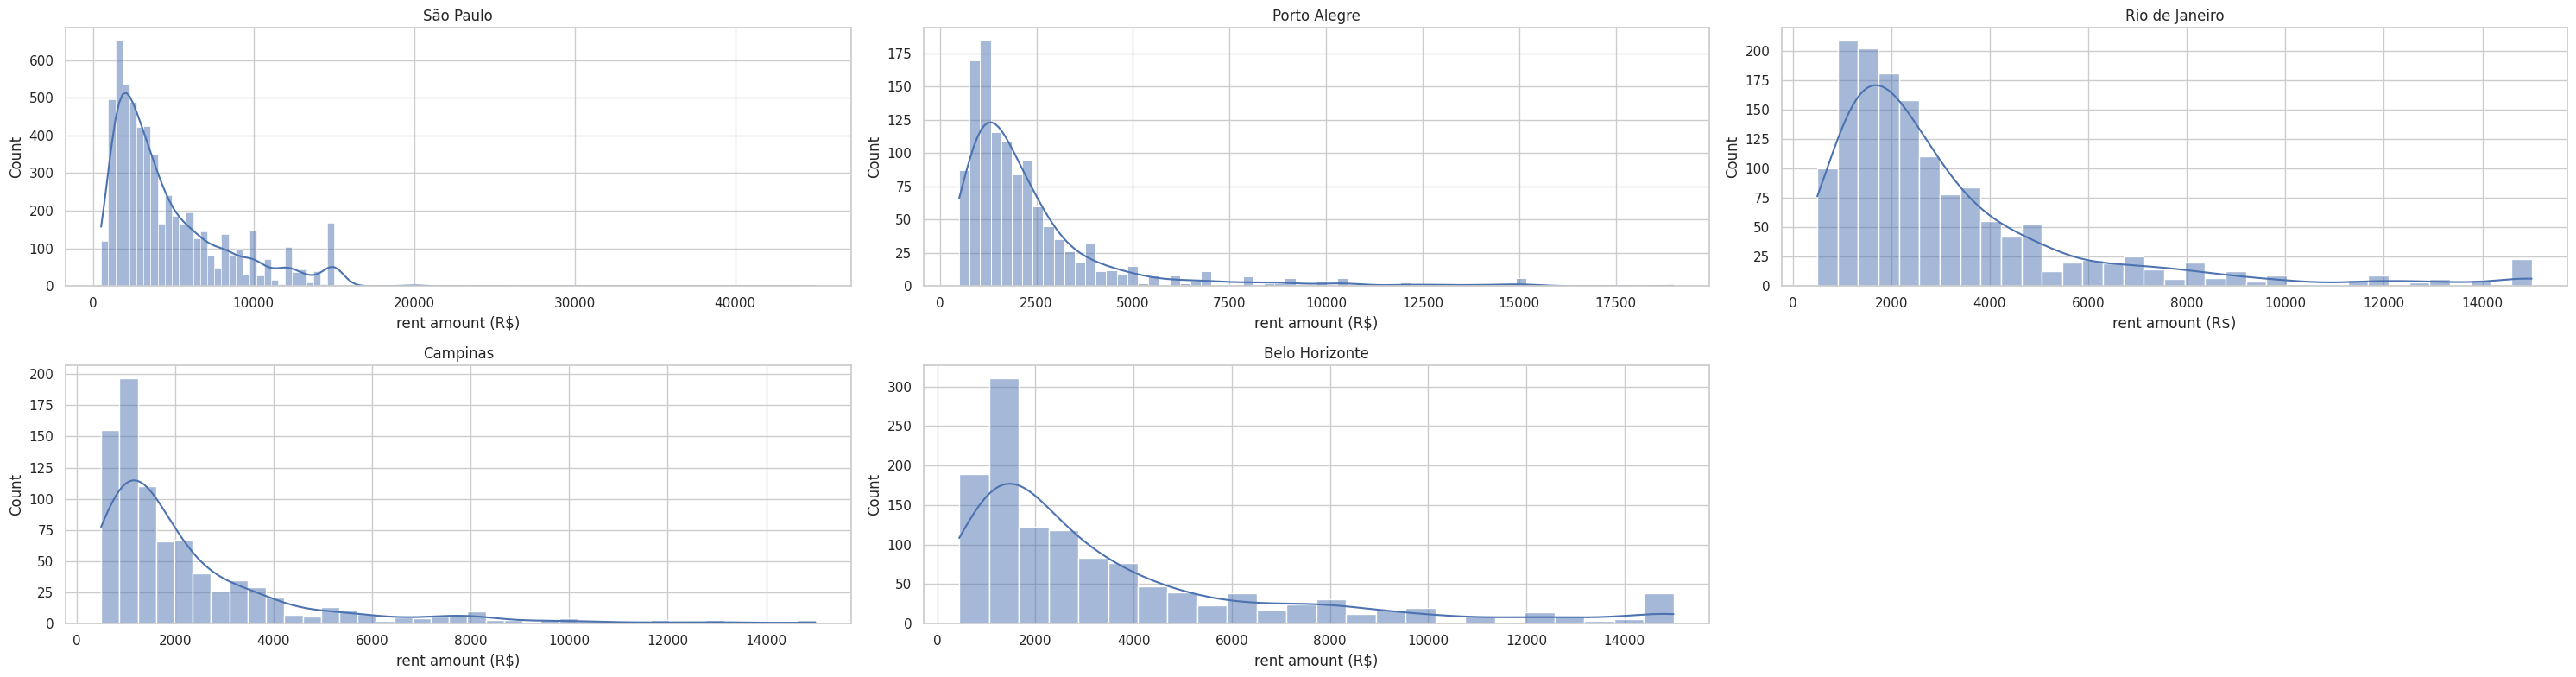

In [ ]:
plt.figure(figsize=(30, 8))

i = 1
for city in df['city'].unique():
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = df.loc[df['city'] == city]
    sns.histplot(city_name['rent amount (R$)'],kde=True)
    i+=1


plt.tight_layout()
plt.show()

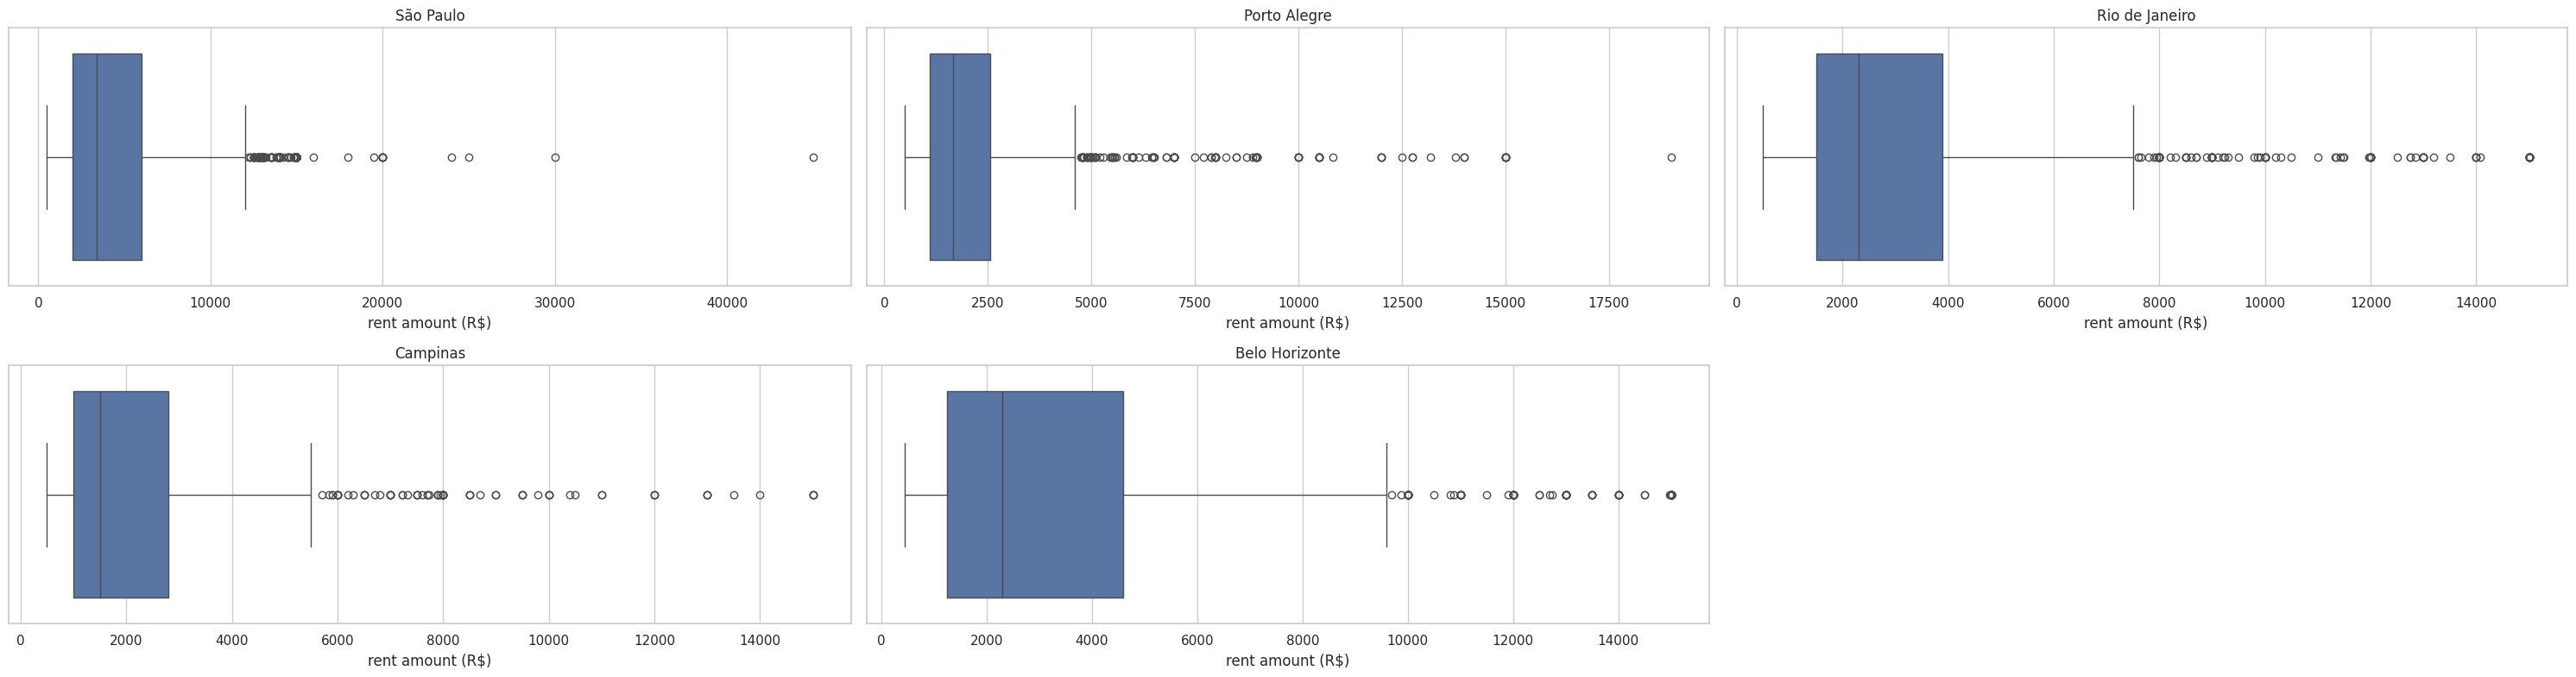

In [ ]:
plt.figure(figsize=(30, 8))

i = 1
for city in df['city'].unique():
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = df.loc[df['city'] == city]
    sns.boxplot(x=city_name['rent amount (R$)'])
    i+=1

plt.tight_layout()
plt.show()

* São Paulo parece tener el alquiler más caro.
* Belo Horizonte y Río de Janeiro tienen alquileres ligeramente más caros que Campinas y Porto Alegre.

## Obtener la intuición sobre todas las características categóricas

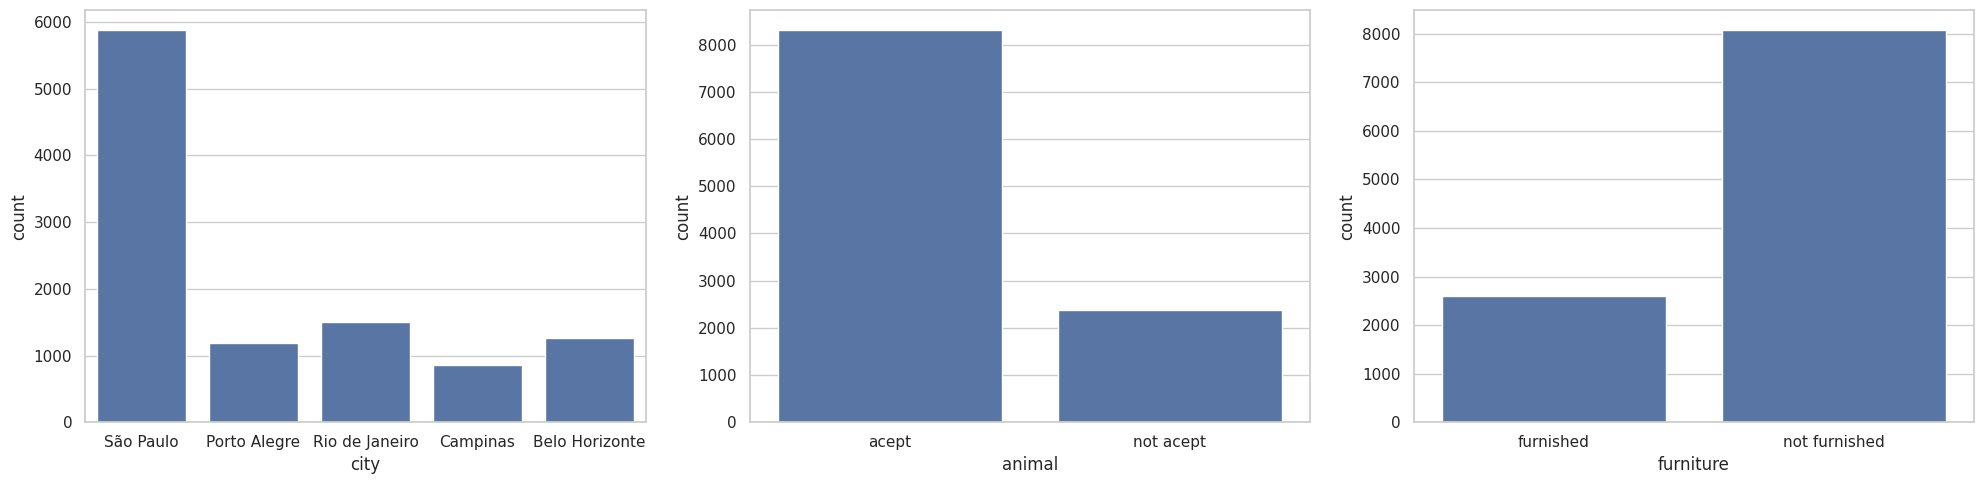

In [ ]:
plt.figure(figsize=(20,5))
j =1
for i in categorical:
    plt.subplot(1,3,j)
    sns.countplot(x=df[i])
    j =j+1
plt.tight_layout()

* São Paulo es la ciudad con más casas
* La mayoría de las casas aceptan animales
* La mayoría de las casas no están amuebladas

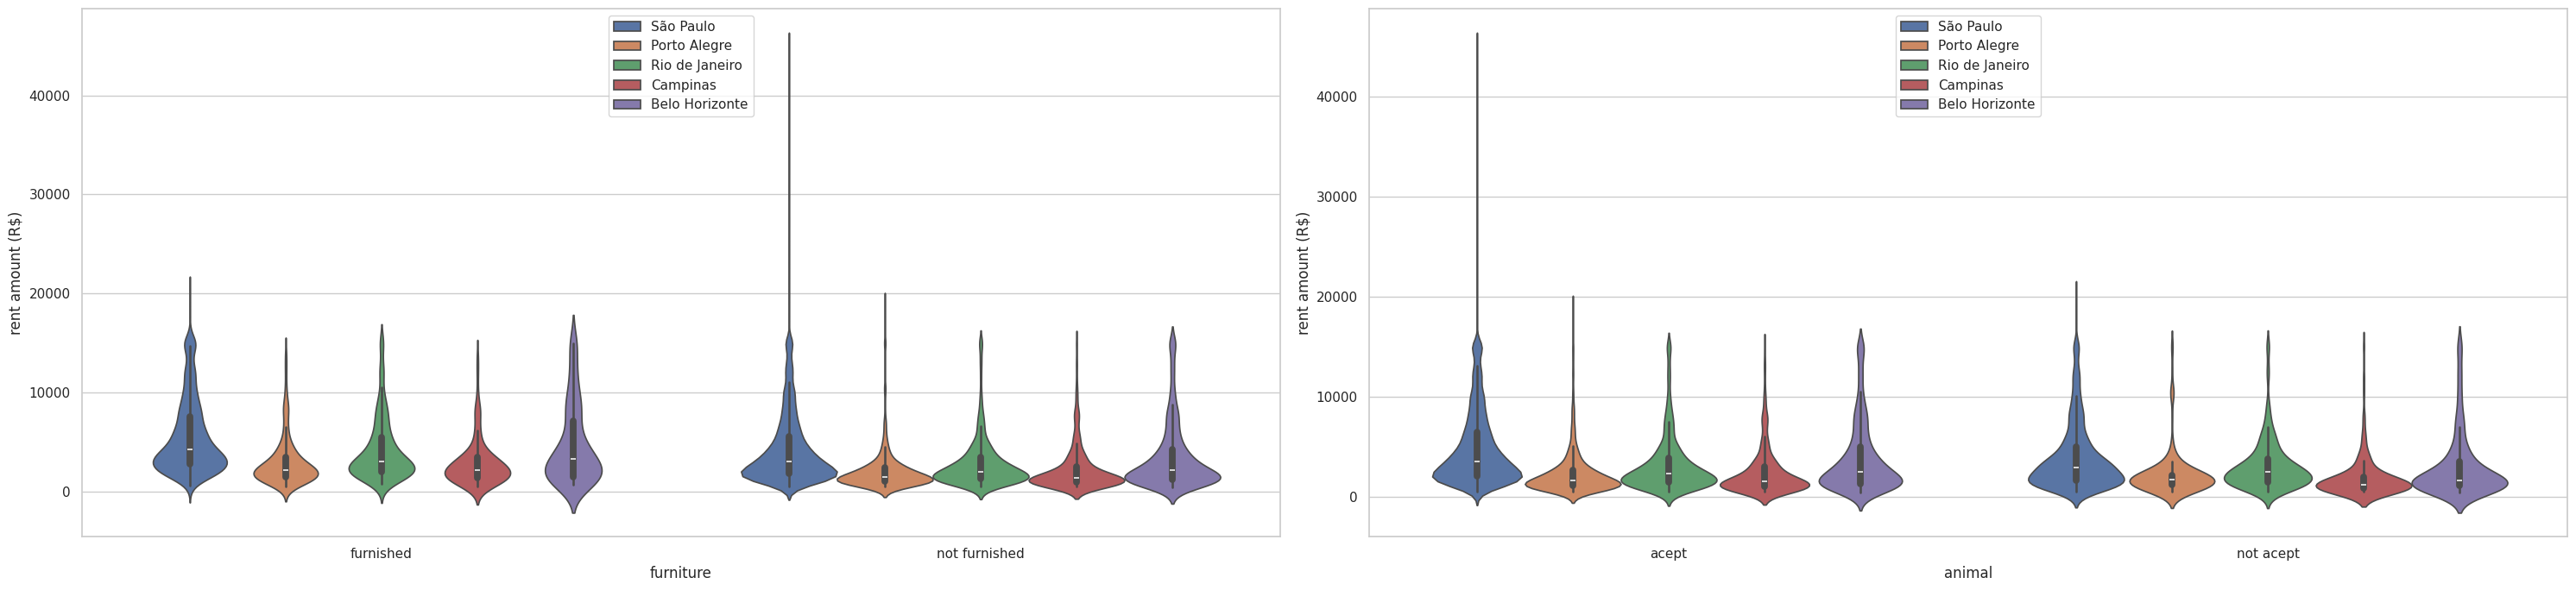

In [ ]:
# Let's take a look about how the rent and animal acceptance is impacted by the furniture
plt.figure(figsize = (30, 7))
plt.subplot(1, 2, 1)
sns.violinplot(x ='furniture', y ='rent amount (R$)', data = df,hue ='city').legend(loc='upper center')
plt.subplot(1, 2, 2)
sns.violinplot(x ='animal', y ='rent amount (R$)', data = df,hue ='city').legend(loc='upper center')
plt.tight_layout()

Al parecer, el amueblado puede influir en el precio debido a la distribución, habrá que examinarlo con más detenimiento. La aceptación de animales no parece tener ningún efecto visible en el precio.

<ipython-input-24-94e214150625>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linecolor='black',vmin=-1, vmax=1)


<Axes: >

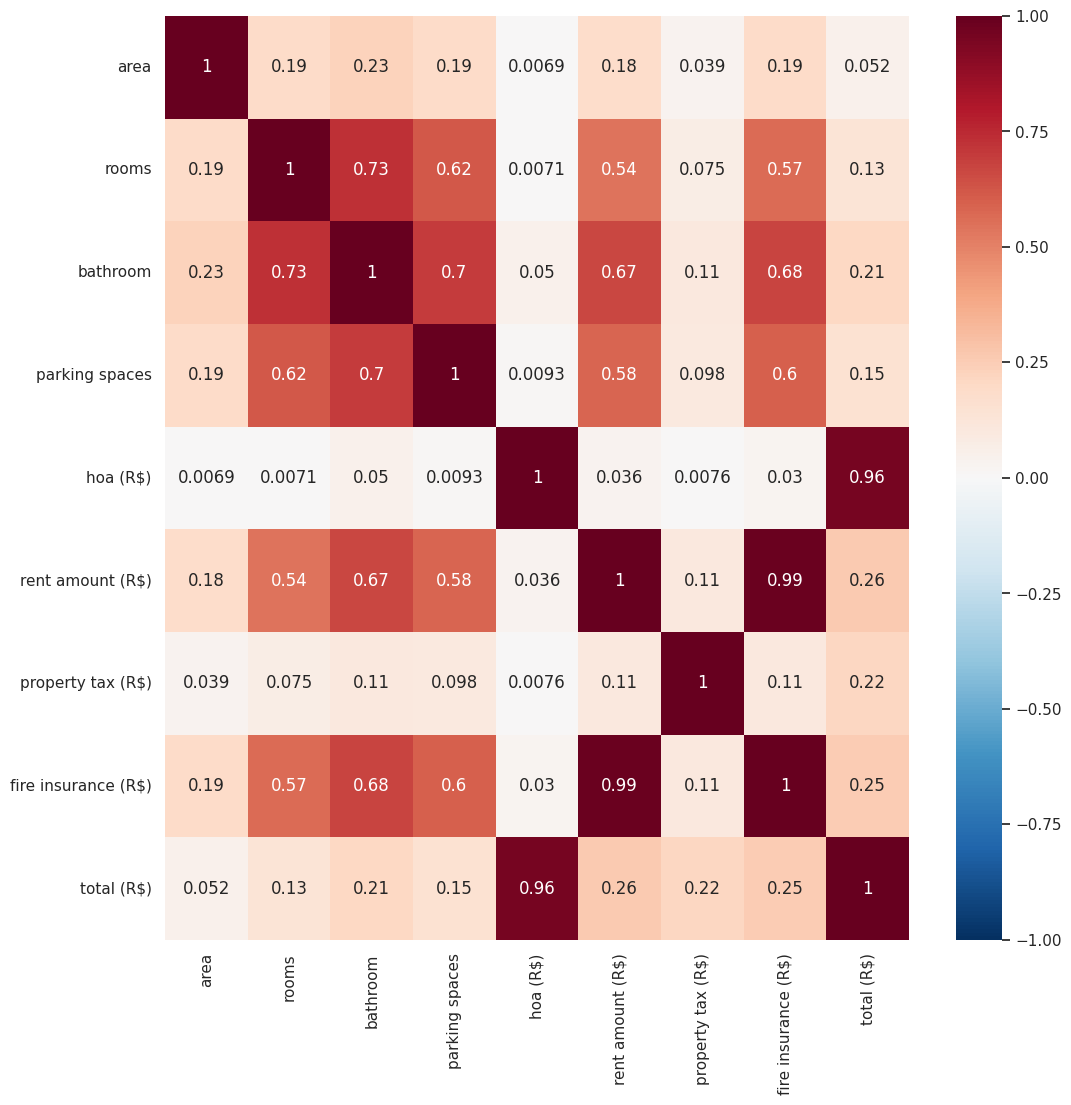

In [ ]:
# Finally, let's see the correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', linecolor='black',vmin=-1, vmax=1)

Las variables que mejor describen el importe del alquiler son

* seguro contra incendios
* plazas de aparcamiento
* cuarto de baño
* habitaciones